In [1]:
%pip install pandas
%pip install matplotlib
%pip install ydata-profiling
%pip install ipywidgets
%pip install tk
%pip install PyQt5
%pip install scikit-learn
%pip install nltk

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport
from techniques import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB


# Ερώτημα 1

In [3]:
df = pd.read_csv( "nlp-getting-started/train.csv" )
df_test = pd.read_csv( "nlp-getting-started/test.csv" )

In [4]:
# profile = ProfileReport( df, title = "nlp_train" )
# with open( "nlp_train.html", "w" ) as f:
# 	f.write( profile.to_html() )

Χρησιμοποιώντας την εντολή φαίνεται ότι η συλλογή δεδομένων έχει κάποια χαρακτηριστικά που δεν χρειάζονται το κείμενο όπου σε αυτό θα δουλέψουμε πάνω και κάποιες λέξεις οι οποίες μπορεί κάποιος να τις βγάλει μέσα από τα tweets. Ενώ το κείμενο έχει κάποιες λέξεις οι οποίες εμφανίζονται συνέχεια όπως άρθρα. Το dataset είναι εξαιρετικά μη ισσοροπημένο ενώ τα keywords είναι ισοροπημένα.

# Ερώτημα 2

In [5]:
df = df.drop( columns = [ "id", "location" ] )
df['keyword'] = df['keyword'].fillna( 'null' )
df['text'] = df['keyword'] + ' ' + df['text']
df = df.drop( columns = [ "keyword" ] )

df_test = df_test.drop( columns = [ "id", "location"] )
df_test['keyword'] = df_test['keyword'].fillna( 'null' )
df_test['text'] = df_test['keyword'] + ' ' + df_test['text']
df_test = df_test.drop( columns = [ "keyword" ] )

# Ερώτημα 3


- removeUnicode: Αφαίρεση λέξεων οι οποίες δεν είναι στα αγγλικά.
- replaceURL: βάζουμε μπροστά το url για να δηλώσουμε ότι ειναι url
- replaceAtUser: Αλλάζει το "@user" με "atUser
- removeHashTagInFrontOfWord: Αφαιρεί το σύμβολο #
- removeNumbers: Αφαιρεί τους αριθμούς
- replaceMultiExclamationMark: Αφαιρεί τα επαναλαμβανόμενα θαυμαστικά
- replaceMultiStopMark το ίδιο για τελείες.
- replaceContraction: Αφαιρεί την σύμπτυξη
- replaceElongated: αλλάζει τις λέξεις που που περιέχουν πολλά γράμματα στο τέλος
- removeEmoticons: αφαιρεί τα emoticons
- addNotTag: βάζει ένα tag στην περίπτωση που είναι αρνητική η πρόταση
- addCapTag: βάζει ένα tag στη περίπτωση όταν μία φράση είναι στα κεφαλαία

In [6]:
def removeQuotes( text ):
	text = text.replace( '"', '' )
	text = text.replace( "'", '' )
	return text
def cleanText( df ):
	for i in range( len( df['text'])):
		text = df.at[i, 'text']
		text = removeUnicode( text )
		text = replaceURL( text )
		text = replaceAtUser( text )
		text = removeHashtagInFrontOfWord( text )
		text = removeNumbers( text )
		text = replaceMultiExclamationMark( text )
		text = replaceMultiQuestionMark( text )
		text = replaceMultiStopMark( text )
		text = replaceContraction( text )
		text = replaceElongated( text )
		text = removeEmoticons( text )
		text = addNotTag( text )
		text = addCapTag( text )
		text = removeQuotes( text )

		df.at[i, 'text'] = text


# df.to_csv( "nlp_cleaned.csv", index = False )

In [7]:
cleanText( df )
cleanText( df_test )

# Ερώτηση 4&5

Επειδή δεν έχω το target για την λύση. Θα σπάσω την βάση δεδομένων.

In [8]:
y = df['target']
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform( df['text'] )
x_data, x_val, y_data, y_val = train_test_split( x, y, test_size = 0.2, random_state = 42 )
# y_test = df_test['target']
# x_test = vectorizer.transform( df_test['text'] )

# Ερώτηση 6

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       874
           1       0.80      0.69      0.74       649

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



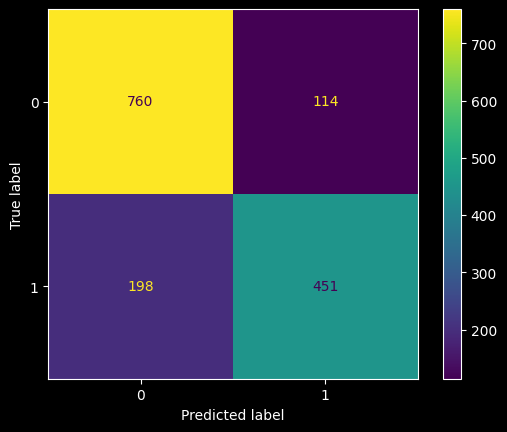

In [9]:
model = SVC( kernel = 'linear' )
model.fit( x_data, y_data )
y_pred = model.predict( x_val )
print( classification_report( y_val, y_pred ) )
cm = confusion_matrix( y_val, y_pred )
disp = ConfusionMatrixDisplay( confusion_matrix = cm, display_labels = model.classes_ )
disp.plot()
plt.show()

Θα έλεγα ότι το πιο σημαντικό σε αυτήν την περίπτωση είναι το f1 καθώς θα θέλαμε να προβλέπουμε και σωστά τους συναγερμούς αλλά και να τους προβλέπουμε με ακρίβεια τέτοια ώστε να μην απευαισθητοποιηθούν πολίτες με ψεύτικους συναγερμούς.

# Ερώτηση 7

In [ ]:
pca = PCA( n_components = 0.95, svd_solver='full' )
x_reduced = pca.fit_transform( x_data.toarray() )
x_data, x_val, y_data, y_val = train_test_split( x_reduced, y, test_size = 0.2, random_state = 42 )

print( f"Original number of features: {x_data.shape[1]}" )
print( f"Reduced number of features: {x_reduced.shape[1]}" )

Original number of features: 17431
Reduced number of features: 4102


In [ ]:
model_pca_linear = SVC( kernel = 'linear', gamma = 'scale')
model_pca_linear.fit( x_data, y_data )
y_pred_pca = model_pca_linear.predict( x_val )
print( classification_report( y_val, y_pred_pca ) )
pca_linear_scale_report = classification_report( y_val, y_pred_pca, output_dict=True )


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4342
           1       0.94      0.81      0.87      3271

    accuracy                           0.90      7613
   macro avg       0.90      0.89      0.89      7613
weighted avg       0.90      0.90      0.89      7613



In [ ]:
model_pca_rbf = SVC( kernel = 'rbf', gamma = 'scale' )
model_pca_rbf.fit( x_data, y_data )
y_pred_pca_rbf = model_pca_rbf.predict( x_data )
print( classification_report( y_val, y_pred_pca_rbf ) )
pca_rbf_scale_report = classification_report( y_val, y_pred_pca_rbf, output_dict=True )



              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4342
           1       0.97      0.89      0.93      3271

    accuracy                           0.94      7613
   macro avg       0.95      0.94      0.94      7613
weighted avg       0.95      0.94      0.94      7613



Γενικότερα η αδιαστασιοποίηση φαίνεται να βοηθάει και τους δύο ταξινομητές ενώ η μη γραμμικότητα της rbf διαχωρίζει καλύτερα τα αποτελέσματα.

In [ ]:
model_pca_linear_auto = SVC( kernel = 'linear', gamma = 'auto')
model_pca_linear_auto.fit( x_data, y_data )
y_pred_pca_auto = model_pca_linear_auto.predict( x_val )
print( classification_report( y_val, y_pred_pca_auto ) )
pca_linear_auto_report = classification_report( y_val, y_pred_pca_auto, output_dict=True )

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4342
           1       0.94      0.81      0.87      3271

    accuracy                           0.90      7613
   macro avg       0.90      0.89      0.89      7613
weighted avg       0.90      0.90      0.89      7613



In [ ]:
model_pca_rbf_auto  = SVC( kernel = 'rbf', gamma = 'auto' )
model_pca_rbf_auto.fit( x_data, y_data )
y_pred_pca_rbf_auto = model_pca_rbf_auto.predict( x_val )
print( classification_report( y_val, y_pred_pca_rbf_auto ) )
pca_rbf_auto_report  = classification_report( y_val, y_pred_pca_rbf_auto , output_dict=True )

              precision    recall  f1-score   support

           0       0.57      1.00      0.73      4342
           1       0.00      0.00      0.00      3271

    accuracy                           0.57      7613
   macro avg       0.29      0.50      0.36      7613
weighted avg       0.33      0.57      0.41      7613



/home/markos/Development/ai_assignments/machine_learning_assignments/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/markos/Development/ai_assignments/machine_learning_assignments/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/markos/Development/ai_assignments/machine_learning_assignments/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with 

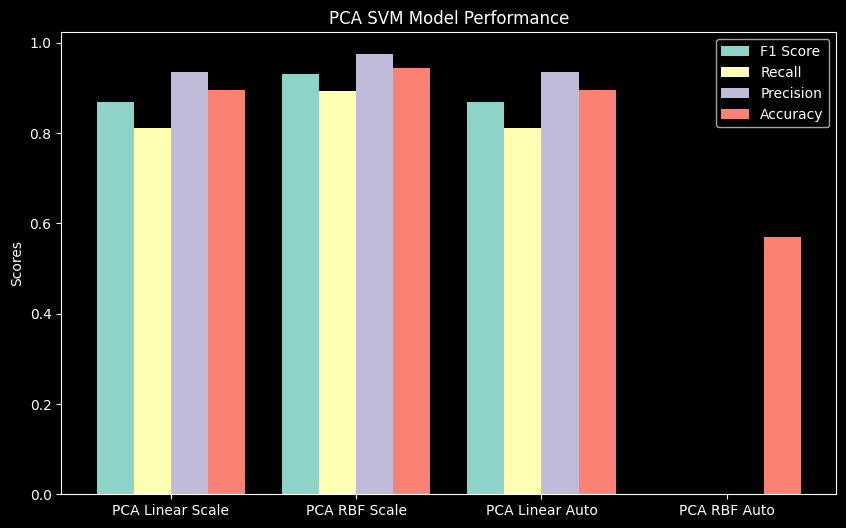

In [15]:
labels = [ 'PCA Linear Scale', 'PCA RBF Scale', 'PCA Linear Auto', 'PCA RBF Auto' ]
f1_scores = [ pca_linear_scale_report['1']['f1-score'], pca_rbf_scale_report['1']['f1-score'], pca_linear_auto_report['1']['f1-score'], pca_rbf_auto_report['1']['f1-score'] ]
recall_scores = [ pca_linear_scale_report['1']['recall'], pca_rbf_scale_report['1']['recall'], pca_linear_auto_report['1']['recall'], pca_rbf_auto_report['1']['recall'] ]
precision_scores = [ pca_linear_scale_report['1']['precision'], pca_rbf_scale_report['1']['precision'], pca_linear_auto_report['1']['precision'], pca_rbf_auto_report['1']['precision'] ]
accuracy_scores = [ pca_linear_scale_report['accuracy'], pca_rbf_scale_report['accuracy'], pca_linear_auto_report['accuracy'], pca_rbf_auto_report['accuracy'] ]
x = range( len( labels ) )
plt.figure( figsize = ( 10, 6 ) )
plt.bar( x, f1_scores, width = 0.2, label = 'F1 Score', align = 'center' )
plt.bar( [ i + 0.2 for i in x ], recall_scores, width = 0.2, label = 'Recall', align = 'center' )
plt.bar( [ i + 0.4 for i in x ], precision_scores, width = 0.2, label = 'Precision', align = 'center' )
plt.bar( [ i + 0.6 for i in x ], accuracy_scores, width = 0.2, label = 'Accuracy', align = 'center' )
plt.xticks( [ i + 0.3 for i in x ], labels )
plt.ylabel( 'Scores' )
plt.title( 'PCA SVM Model Performance' )
plt.legend()
plt.show()

<!-- print( model_pca_rbf. ) -->

Το 'scaled' υπολογίζει αυτόματα το gamma όπου η ποσότητα αυτή ρυθμίζει την επίδραση των δεδομένων μεταξύ τους. 

# Ερώτημα 9

In [ ]:
y = df['target']
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform( df['text'] )
x_data, x_val, y_data, y_val = train_test_split( x, y, test_size = 0.2, random_state = 42 )

model = GaussianNB()
model.fit( x_data.toarray(), y_data )
y_pred = model.predict( x_val.toarray() )
print( classification_report( y_val, y_pred ) )

              precision    recall  f1-score   support

           0       0.77      0.52      0.62       874
           1       0.55      0.79      0.65       649

    accuracy                           0.63      1523
   macro avg       0.66      0.65      0.63      1523
weighted avg       0.67      0.63      0.63      1523



Ο naive bayes δεν βγάζει τόσο καλά αποτελέσματε σε σύγκριση με τον SVC. Αυτό έχει να κάνει με την υπόθεση ανεξαρτήτων γεγονότων. Από την άλλη ο SVC προσπαθεί να βρει δείγματα στον χώρο όπου μπορεί από αυτά να περάσει επιφάνειες.